<a href="https://colab.research.google.com/github/z-arabi/Machine-Learning/blob/main/linear_regression_5_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
!git clone https://github.com/z-arabi/Machine-Learning.git
%cd Machine-Learning

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 34 (delta 7), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (34/34), done.
/content/Machine-Learning


In [3]:
# price prediction based on the features

df = pd.read_csv('./Datasets/car price/CarPrice_Assignment.csv')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
'''
preprocessing we have to do on data
1. drop the columns with id or other features that leads to memorize the data > id, name, ...
* company name is ok but the unique name is not
* linear reg is a weak algo > doesn't memorize but NN does it
2. convert all of the non numeric columns into numeric mapping
'''
df2 = df

# no inplace
# df2 = df2.drop('car_ID', axis=1)
# df2 = df2.drop('CarName', axis=1)

df2 = df2.drop(['car_ID','CarName'],axis=1)
df2.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df = df.drop(['car_ID','CarName'],axis=1)
df.head(6)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [6]:
df.tail()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
df.columns #iterables

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [8]:
# df['fueltype']
s = df.fueltype
print(type(s))
print(s)

<class 'pandas.core.series.Series'>
0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fueltype, Length: 205, dtype: object


In [9]:
# mathematic describe for numeric columns
# counts the nonNaN data > NaN data > missing value > we have to fill them or drop them
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


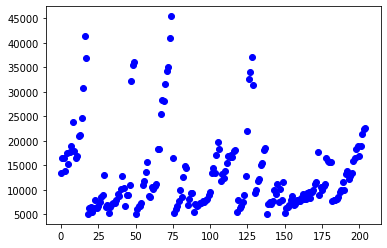

In [10]:
# x=index, y=value > plt.plot > can accepts the series > numeric
plt.plot(df.price, 'bo')

(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 10 Patch objects>)

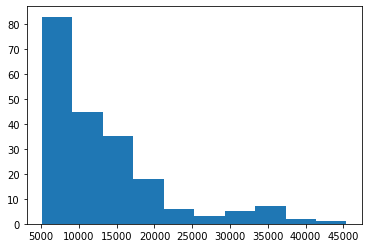

In [11]:
plt.hist(df.price)

(array([185.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  20.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

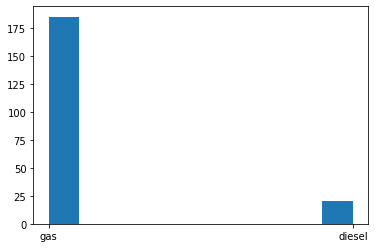

In [12]:
# both data numeric and string
plt.hist(df.fueltype)

Text(0, 0.5, 'carheight')

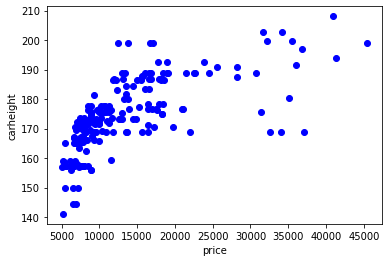

In [13]:
# visualize two numeric values based on each other
plt.plot(df.price, df.carlength, 'bo')
plt.xlabel('price')
plt.ylabel('carheight')

# degree 2, log, ... are  good for fitting the data

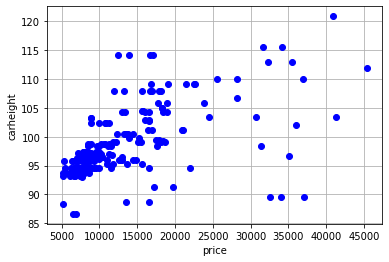

In [14]:
plt.plot(df.price, df.wheelbase, 'bo')
plt.xlabel('price')
plt.ylabel('carheight')
plt.grid()

# line is good for fittng data

In [15]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [16]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [17]:
def pow2(a):
    return a ** 2

b = [1, 2, 3, 4, 5]

list(map(pow2, b))

[1, 4, 9, 16, 25]

In [18]:
def t(x):
    if x == 'gas':
        return 0
    else:
        return 1

# 1. write map function > series == array == list 
# df.fueltype = df.fueltype.map(t)
df.fueltype = df.fueltype.map(lambda x: 0 if x == 'gas' else 1)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
df.fueltype.value_counts()

0    185
1     20
Name: fueltype, dtype: int64

In [20]:
# 2. filtering
a = np.array([1,2,3,4,5,6,7])
print(a<4)
# t/f as an index
print(a[a<4])

[ True  True  True False False False False]
[1 2 3]


In [21]:
df.fueltype = df.fueltype.map(lambda x : 'gas' if x==0 else 'diesel')

df.fueltype[df.fueltype == 'gas'] = 0
df.fueltype[df.fueltype == 'diesel'] = 1

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
df.fueltype.value_counts()

0    185
1     20
Name: fueltype, dtype: int64

In [23]:
df.fueltype.unique()

array([0, 1], dtype=object)

In [24]:
df.fueltype

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    1
204    0
Name: fueltype, Length: 205, dtype: object

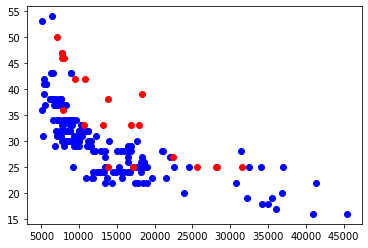

In [25]:
# it can be gas or 0
plt.plot(df.price[df.fueltype==0], df.highwaympg[df.fueltype==0],'bo')
plt.plot(df.price[df.fueltype==1], df.highwaympg[df.fueltype==1],'ro')

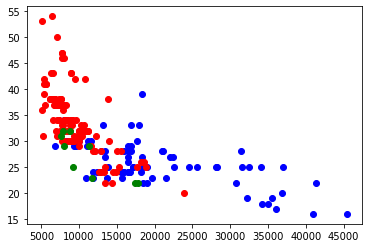

In [26]:
plt.plot(df.price[df.drivewheel=='rwd'], df.highwaympg[df.drivewheel=='rwd'],'bo')
plt.plot(df.price[df.drivewheel=='fwd'], df.highwaympg[df.drivewheel=='fwd'],'ro')
plt.plot(df.price[df.drivewheel=='4wd'], df.highwaympg[df.drivewheel=='4wd'],'go')

In [27]:
# 3. get dummies > the previous approaches good for 2 values not more than that
# more than one value > one hot encoding > 4 values = 4 columns

df.fueltype = df.fueltype.map(lambda x : 'gas' if x==0 else 'diesel')
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [28]:
# it doesn't change df
pd.get_dummies(df,columns=["fueltype"]) # remove fuel > fueltype_diesel	fueltype_gas
pd.get_dummies(df,columns=["fueltype"], drop_first=True) # rather than 2 cols > one col > remove fuel > fueltype_gas
pd.get_dummies(df,prefix=["new"], columns=["fueltype"], drop_first=True)
pd.get_dummies(df,columns=["fueltype"], drop_first=True, dummy_na=True) # add another column > nan or not the value

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,fueltype_nan
0,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0
1,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0
2,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0
3,2,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0
4,2,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.78,3.15,9.5,114,5400,23,28,16845.0,1,0
201,-1,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,3.78,3.15,8.7,160,5300,19,25,19045.0,1,0
202,-1,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.58,2.87,8.8,134,5500,18,23,21485.0,1,0
203,-1,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0


In [29]:
# we have two main dtype for series > object + numeric
for c in df.columns:
    if df[c].dtype == 'object':
        print('-' * 10)
        print(c)
        print(df[c].unique())

----------
fueltype
['gas' 'diesel']
----------
aspiration
['std' 'turbo']
----------
doornumber
['two' 'four']
----------
carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
----------
drivewheel
['rwd' 'fwd' '4wd']
----------
enginelocation
['front' 'rear']
----------
enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
----------
cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
----------
fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [30]:
# for al of the columns which is binary > one col is enough
# for more than two value > we need al columns > dropfirst = false
binary_columns = ['enginelocation', 'doornumber', 'aspiration', 'fueltype']
df = pd.get_dummies(df, prefix=binary_columns, columns=binary_columns , drop_first=True)

In [31]:
df.head()

,symboling,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,enginelocation_rear,doornumber_two,aspiration_turbo,fueltype_gas
0,3,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,...,9.0,111,5000,21,27,13495.0,0,1,0,1
1,3,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,...,9.0,111,5000,21,27,16500.0,0,1,0,1
2,1,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,...,9.0,154,5000,19,26,16500.0,0,1,0,1
3,2,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,...,10.0,102,5500,24,30,13950.0,0,0,0,1
4,2,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,...,8.0,115,5500,18,22,17450.0,0,0,0,1


In [32]:
for c in df.columns:
    if df[c].dtype == 'object':
        print('-' * 10)
        print(c)
        print(len(df[c].value_counts()))

----------
carbody
5
----------
drivewheel
3
----------
enginetype
7
----------
cylindernumber
7
----------
fuelsystem
8


In [33]:
binary_columns = []
categorical_columns = []

for c in df.columns:
    if df[c].dtype == 'object':
        if len(df[c].value_counts()) == 2:
            binary_columns.append(c)
        elif len(df[c].value_counts()) > 2:
            categorical_columns.append(c)
print(binary_columns)
print(categorical_columns)

[]
['carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem']


In [34]:
df = pd.get_dummies(df, prefix=binary_columns, columns=binary_columns , drop_first=True)
df = pd.get_dummies(df, prefix=categorical_columns, columns=categorical_columns)

In [35]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
df.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'enginelocation_rear', 'doornumber_two', 'aspiration_turbo',
       'fueltype_gas', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

# Training a model

In [37]:
# prepare data
df = pd.read_csv('./Datasets/car price/CarPrice_Assignment.csv')
df = df.drop(['car_ID','CarName'],axis=1)
binary_columns = []
categorical_columns = []

for c in df.columns:
    if df[c].dtype == 'object':
        if len(df[c].value_counts()) == 2:
            binary_columns.append(c)
        elif len(df[c].value_counts()) > 2:
            categorical_columns.append(c)

df = pd.get_dummies(df, prefix=binary_columns, columns=binary_columns , drop_first=True)
df = pd.get_dummies(df, prefix=categorical_columns, columns=categorical_columns)

print(df.shape)

(205, 49)


In [38]:
# series is array > not matrix > we convert both x and y to matrix
y = df.price.to_numpy().reshape(-1, 1)
df = df.drop('price', axis=1)

# convert df to numpy
X = df.to_numpy()

In [39]:
print(X.shape)
print(y.shape)

(205, 48)
(205, 1)


In [40]:
from sklearn import preprocessing

# normalize all of the samples of one feature > 0
X = preprocessing.normalize(X,axis=0)
X.min(), X.max(), X.shape

(-0.09335200560186732, 1.0, (205, 48))

In [41]:
lr_model = LinearRegression()
lr_model.fit(X, y)
print(len(lr_model.coef_[0]), lr_model.intercept_)

48 [-41525.66363692]


In [42]:
h = lr_model.predict(X)
MSE = np.mean((y - h) ** 2) / 2
print(MSE ** 0.5)

1385.5414383579034
